 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whales_data = Path("./Resources/whale_returns.csv")
whales_df = pd.read_csv(whales_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
whales_df.sort_index(inplace=True)
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whales_df.dropna(inplace=True)
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
spx_data = Path("./Resources/sp500_history.csv")
spx_df = pd.read_csv(spx_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
spx_df.sort_index(inplace=True)
spx_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
spx_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
spx_df["Close"] = spx_df["Close"].str.replace("$","").astype("float")
spx_df.head()

C:\Users\mdcod\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
spx_returns = spx_df.pct_change()
spx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
spx_returns.dropna(inplace=True)
spx_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename `Close` Column to be specific to this portfolio.
spx_returns.columns=["SPX"]
spx_returns.head()

,SPX
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns = pd.concat([whales_df, algo_df, spx_returns], axis="columns", join="inner")
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

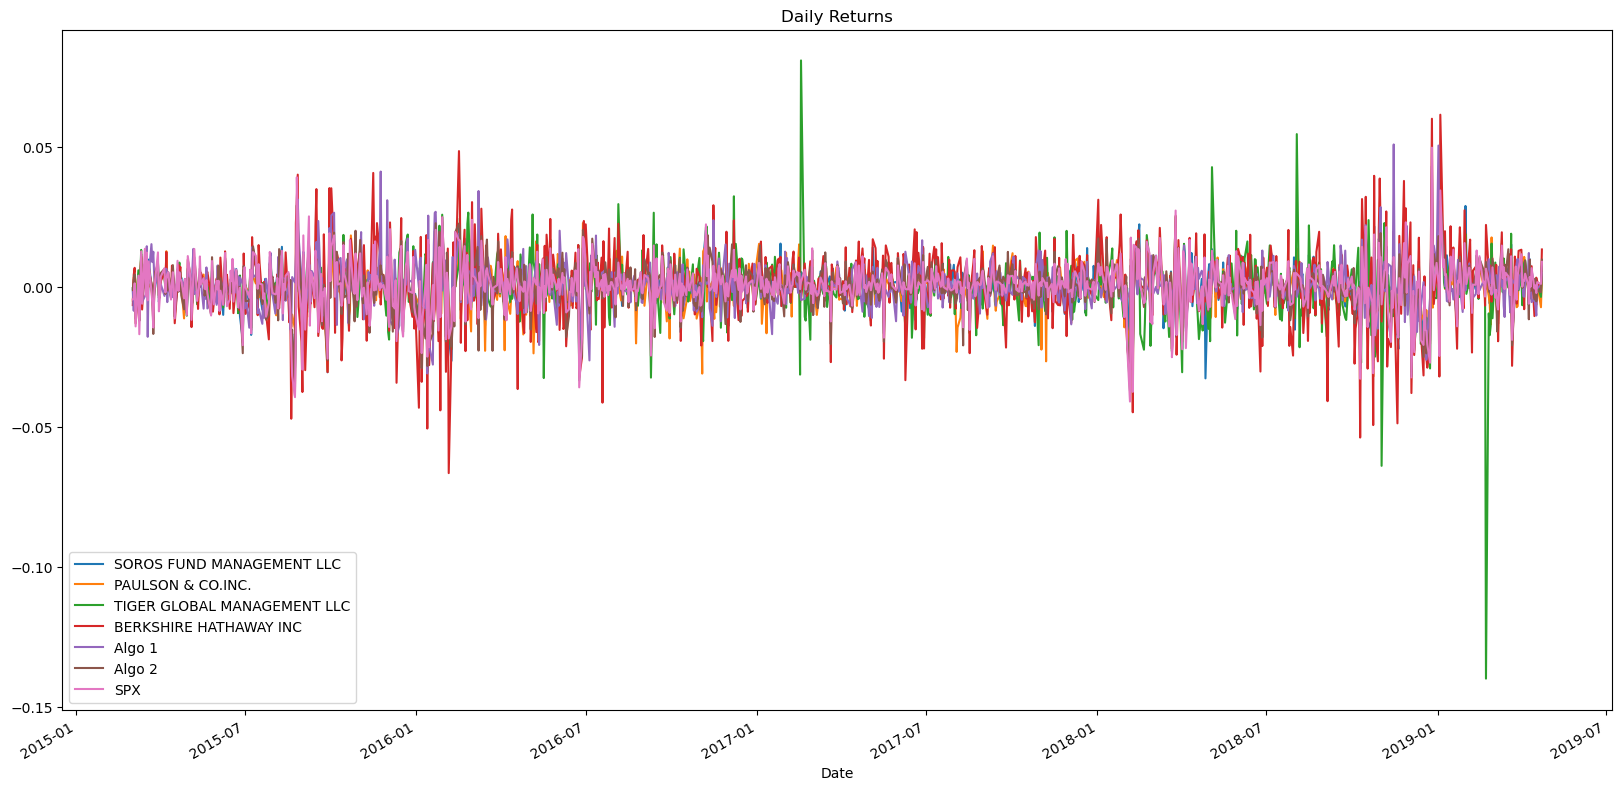

In [15]:
# Plot daily returns of all portfolios
joined_returns.plot(figsize=(20,10), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Performance'}, xlabel='Date'>

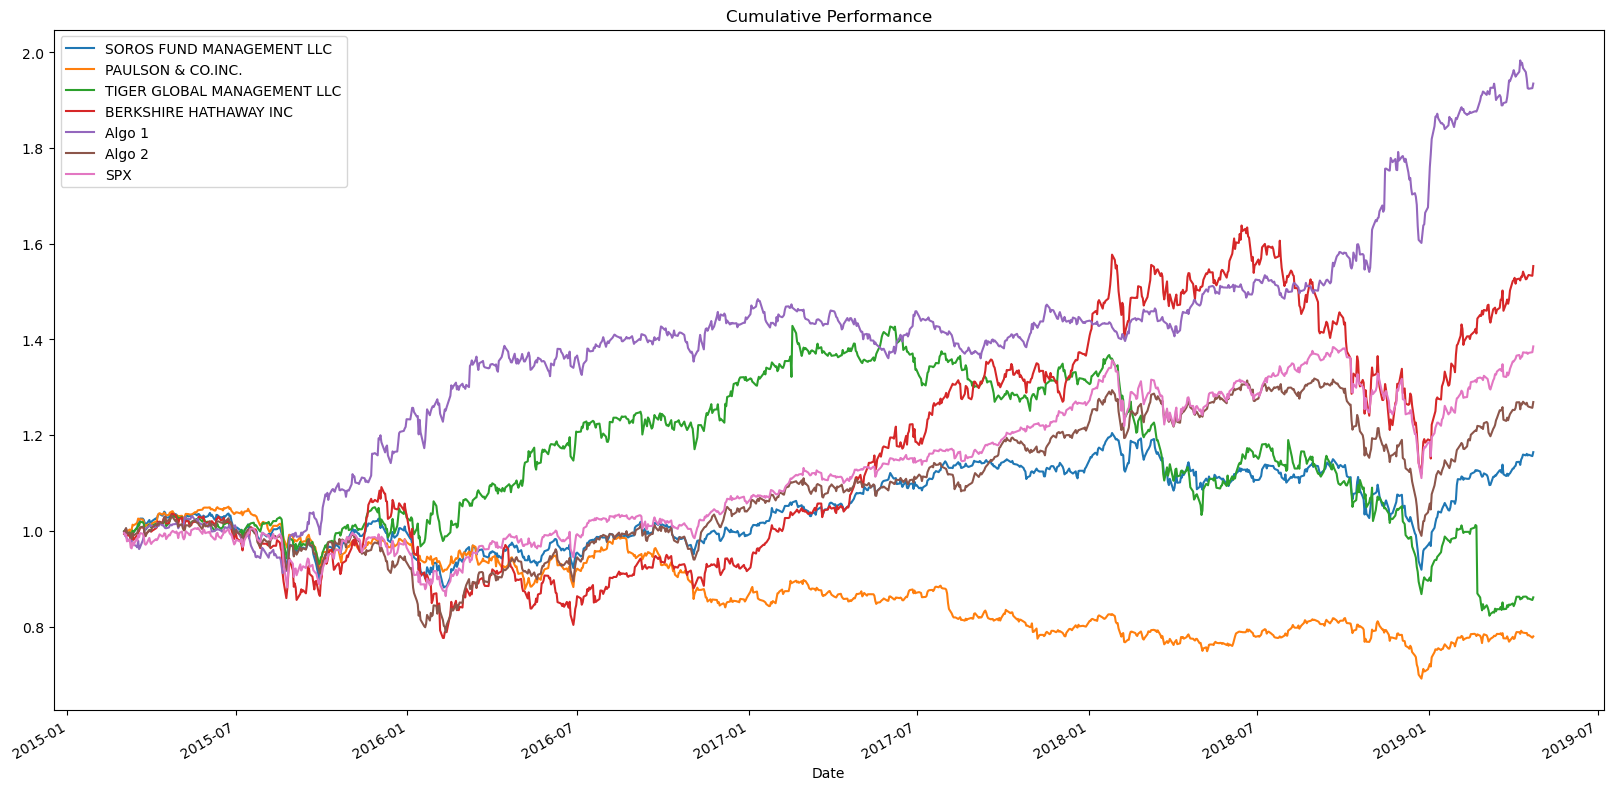

In [16]:
# Calculate cumulative returns of all portfolios
joined_cumulative = (1+joined_returns).cumprod()

# Plot cumulative returns
joined_cumulative.plot(figsize=(20,10), title="Cumulative Performance")

# Berkshire Hathaway and Algo 1 outperform the SPX.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns'}>

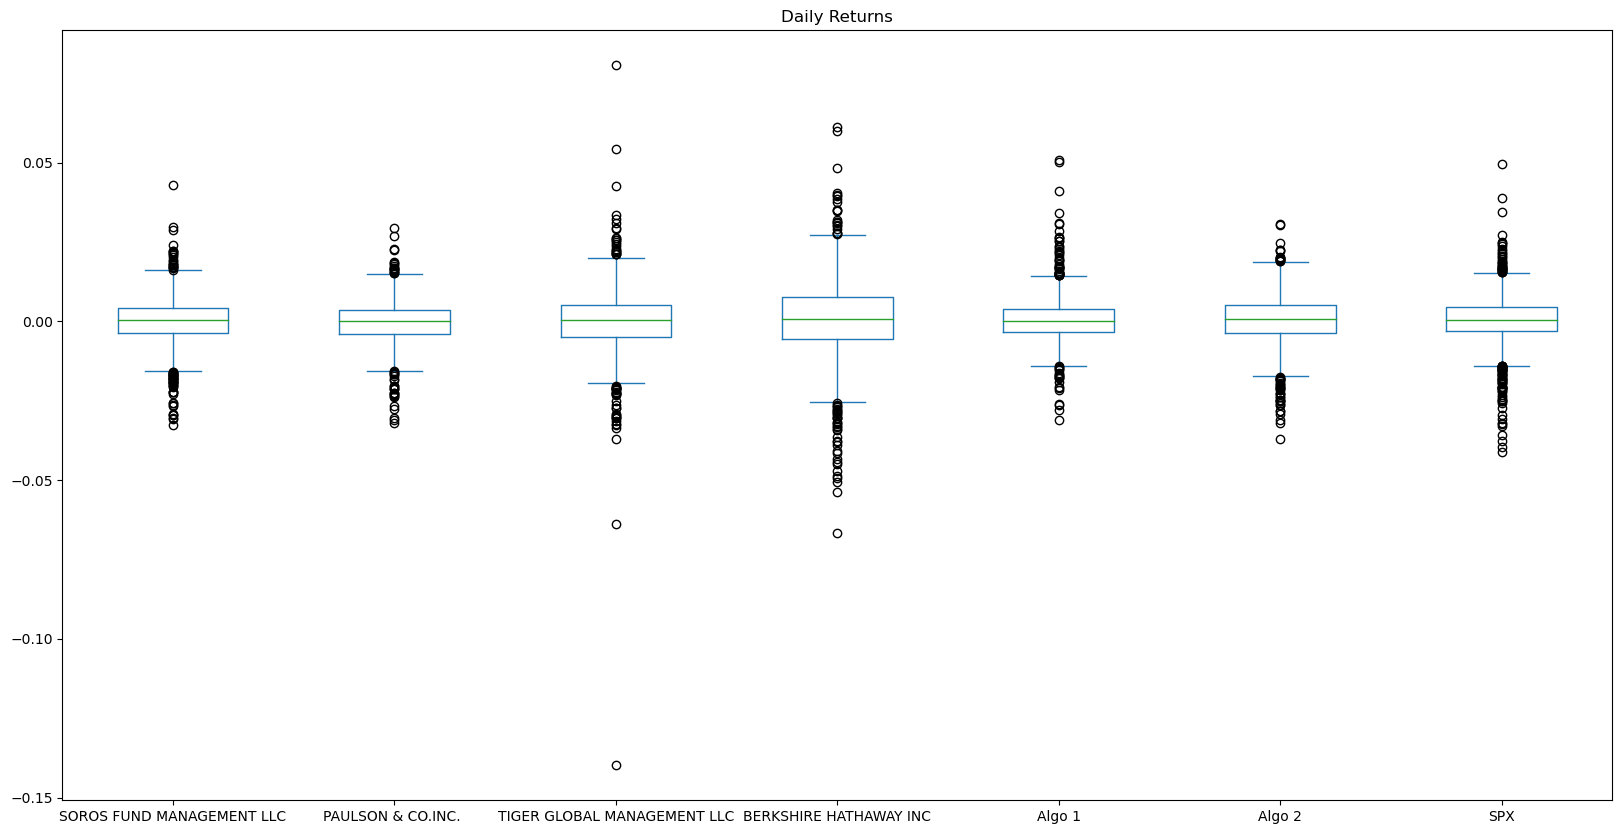

In [17]:
# Box plot to visually show risk
joined_returns.plot(figsize=(20,10), kind="box", title = "Daily Returns")

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
joined_std = joined_returns.std()
joined_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SPX                            0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

As shown above, Berkshire Hathaway and Tiger Global are riskier than the S&P 500 (SPX).

### Calculate the Annualized Standard Deviation

In [19]:
# Calculate the annualized standard deviation (252 trading days)
joined_std_ann = joined_std * np.sqrt(252)
joined_std_ann.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SPX                            0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21D STD'}, xlabel='Date'>

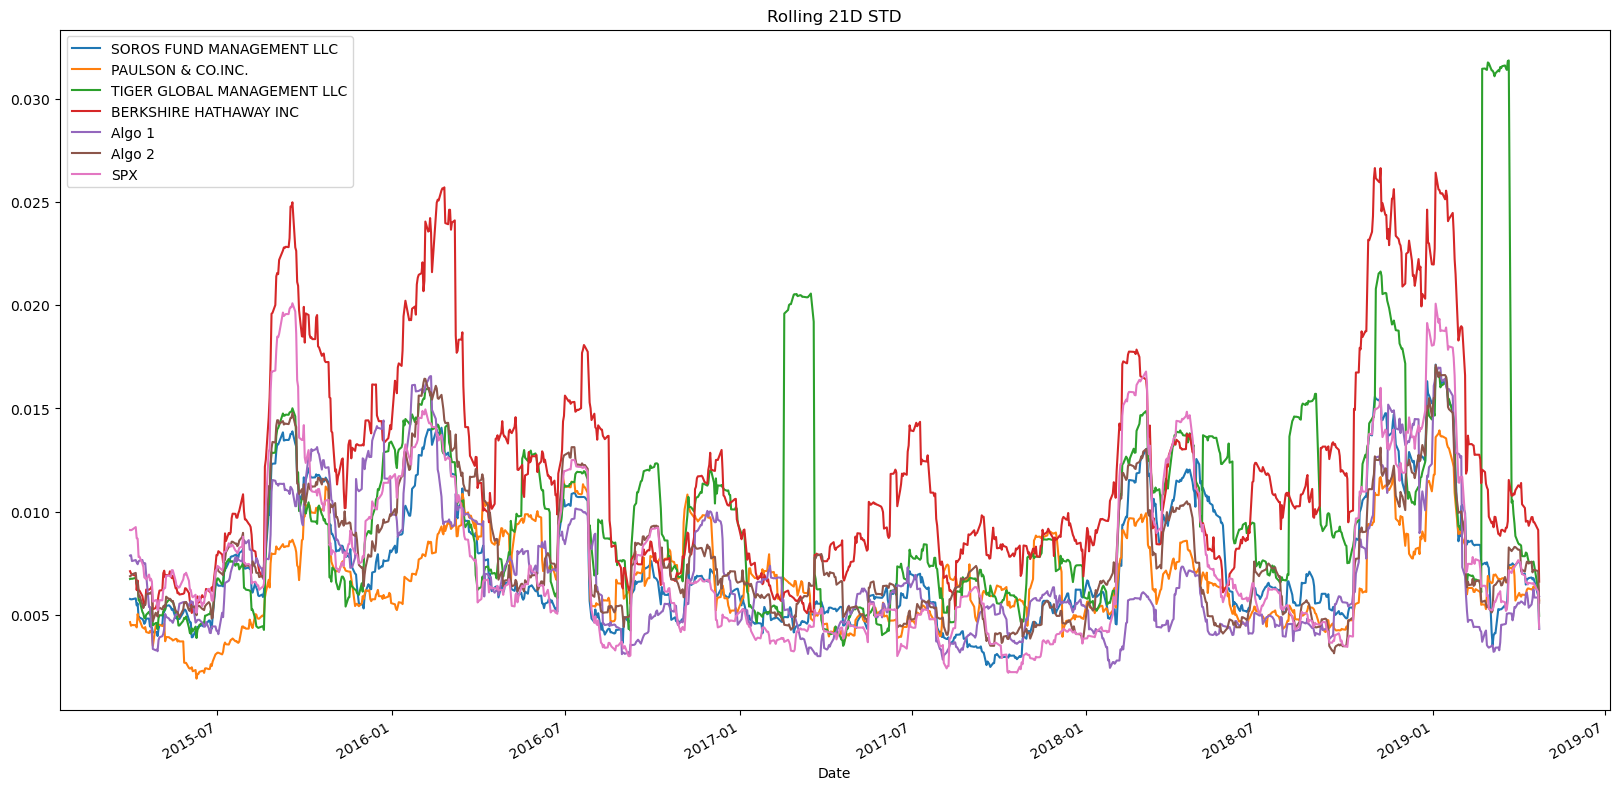

In [20]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

joined_returns.rolling(window=21).std().plot(figsize=(20,10), title = "Rolling 21D STD")

### Calculate and plot the correlation

<AxesSubplot:>

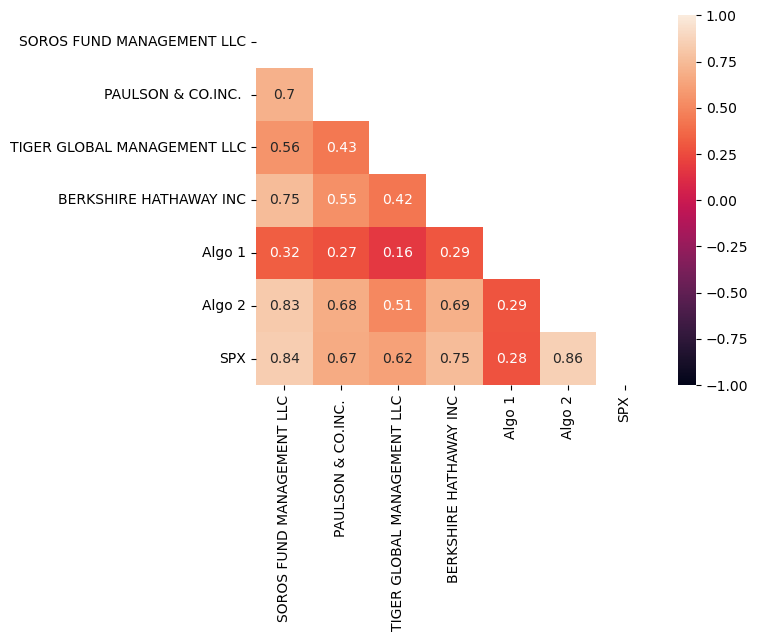

In [21]:
# Calculate the correlation
correlation = joined_returns.corr()

# Display de correlation matrix
mask=np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, mask=mask)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60D Beta of Algo 1 vs SPX'}, xlabel='Date'>

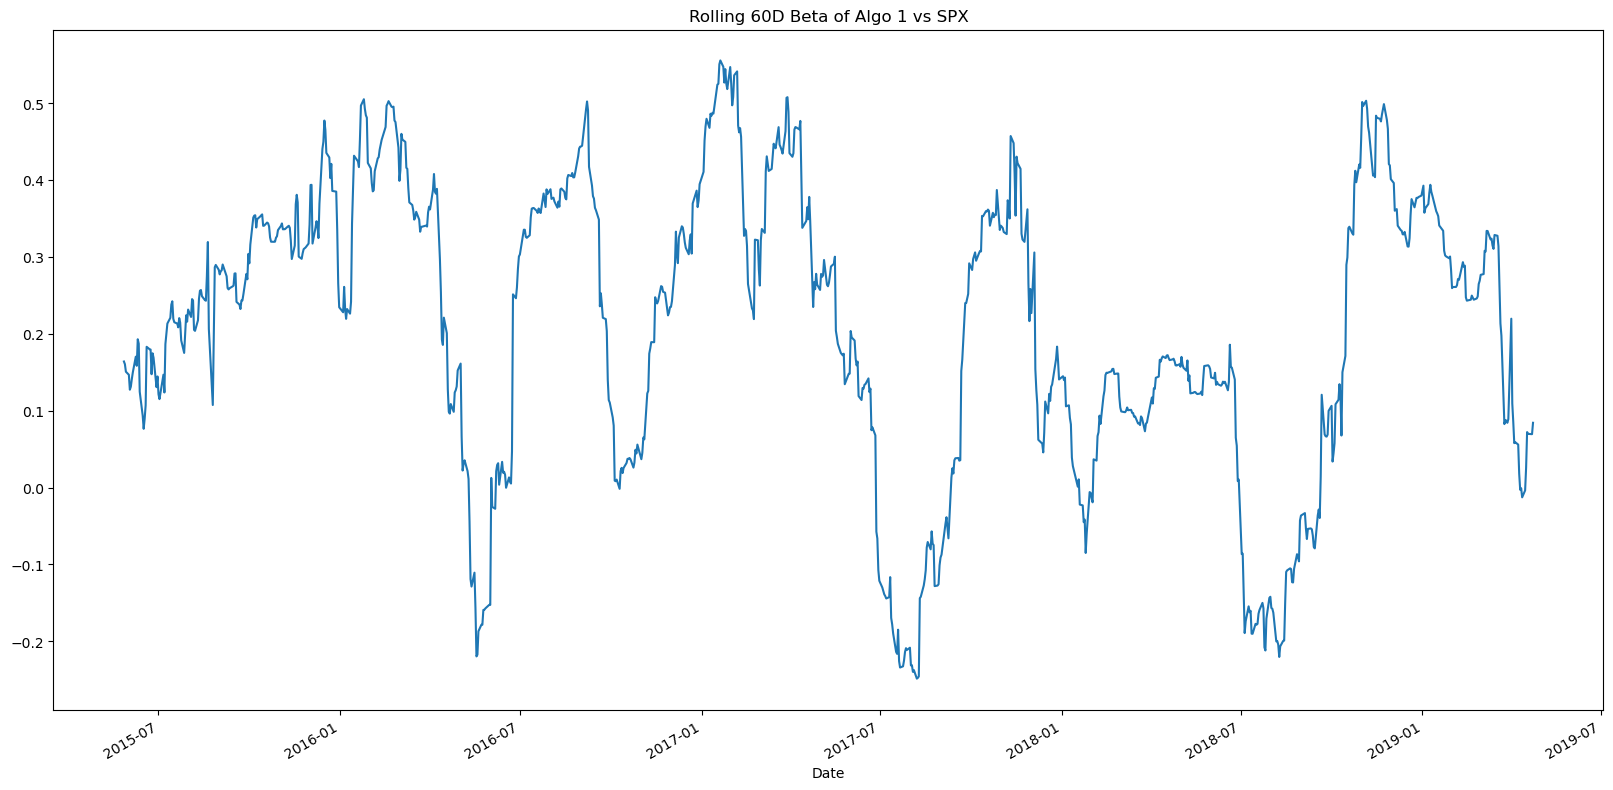

In [22]:
# Calculate covariance of a single portfolio
covariance_algo1 = joined_returns["Algo 1"].cov(joined_returns["SPX"])
covariance_algo1

# Calculate variance of S&P 500
variance = joined_returns["SPX"].var()
variance

# Computing beta
beta_algo1 = covariance_algo1/variance
beta_algo1

# Plot beta trend
rolling_cov_algo1 = joined_returns["Algo 1"].rolling(window=60).cov(joined_returns["SPX"])
rolling_variance = joined_returns["SPX"].rolling(window=60).var()

rolling_beta_algo1 = rolling_cov_algo1/rolling_variance
rolling_beta_algo1.plot(figsize=(20,10), title = "Rolling 60D Beta of Algo 1 vs SPX")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'21D Half-life Exponentially Weighted Moving Average STD'}, xlabel='Date'>

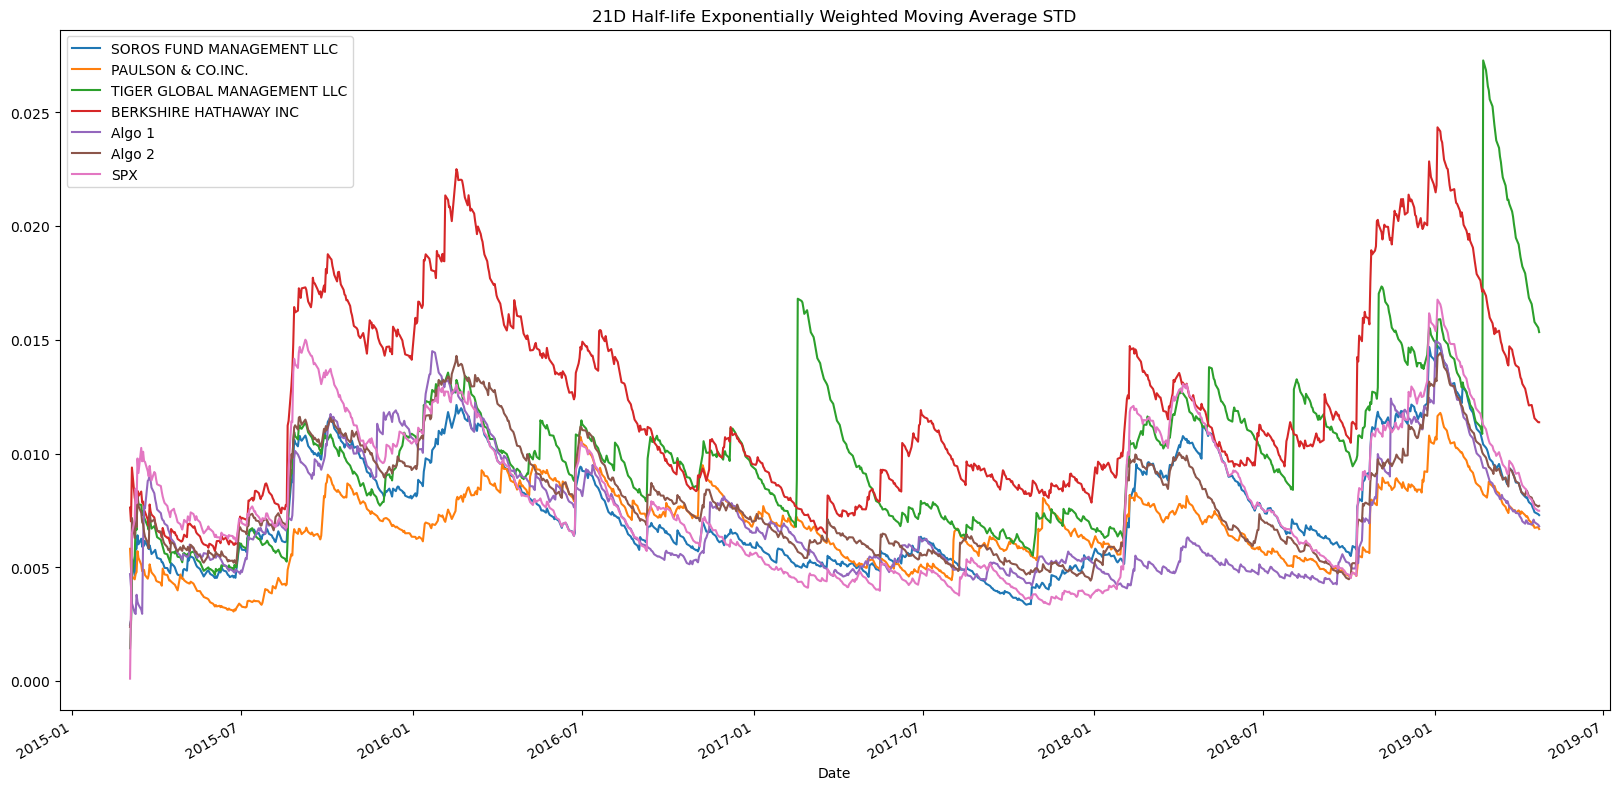

In [23]:
# Use `ewm` to calculate the rolling window
joined_returns.ewm(halflife=21).std().plot(figsize=(20,10), title = "21D Half-life Exponentially Weighted Moving Average STD")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [24]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_returns.mean() * 252) / (joined_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.378648
SPX                            0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

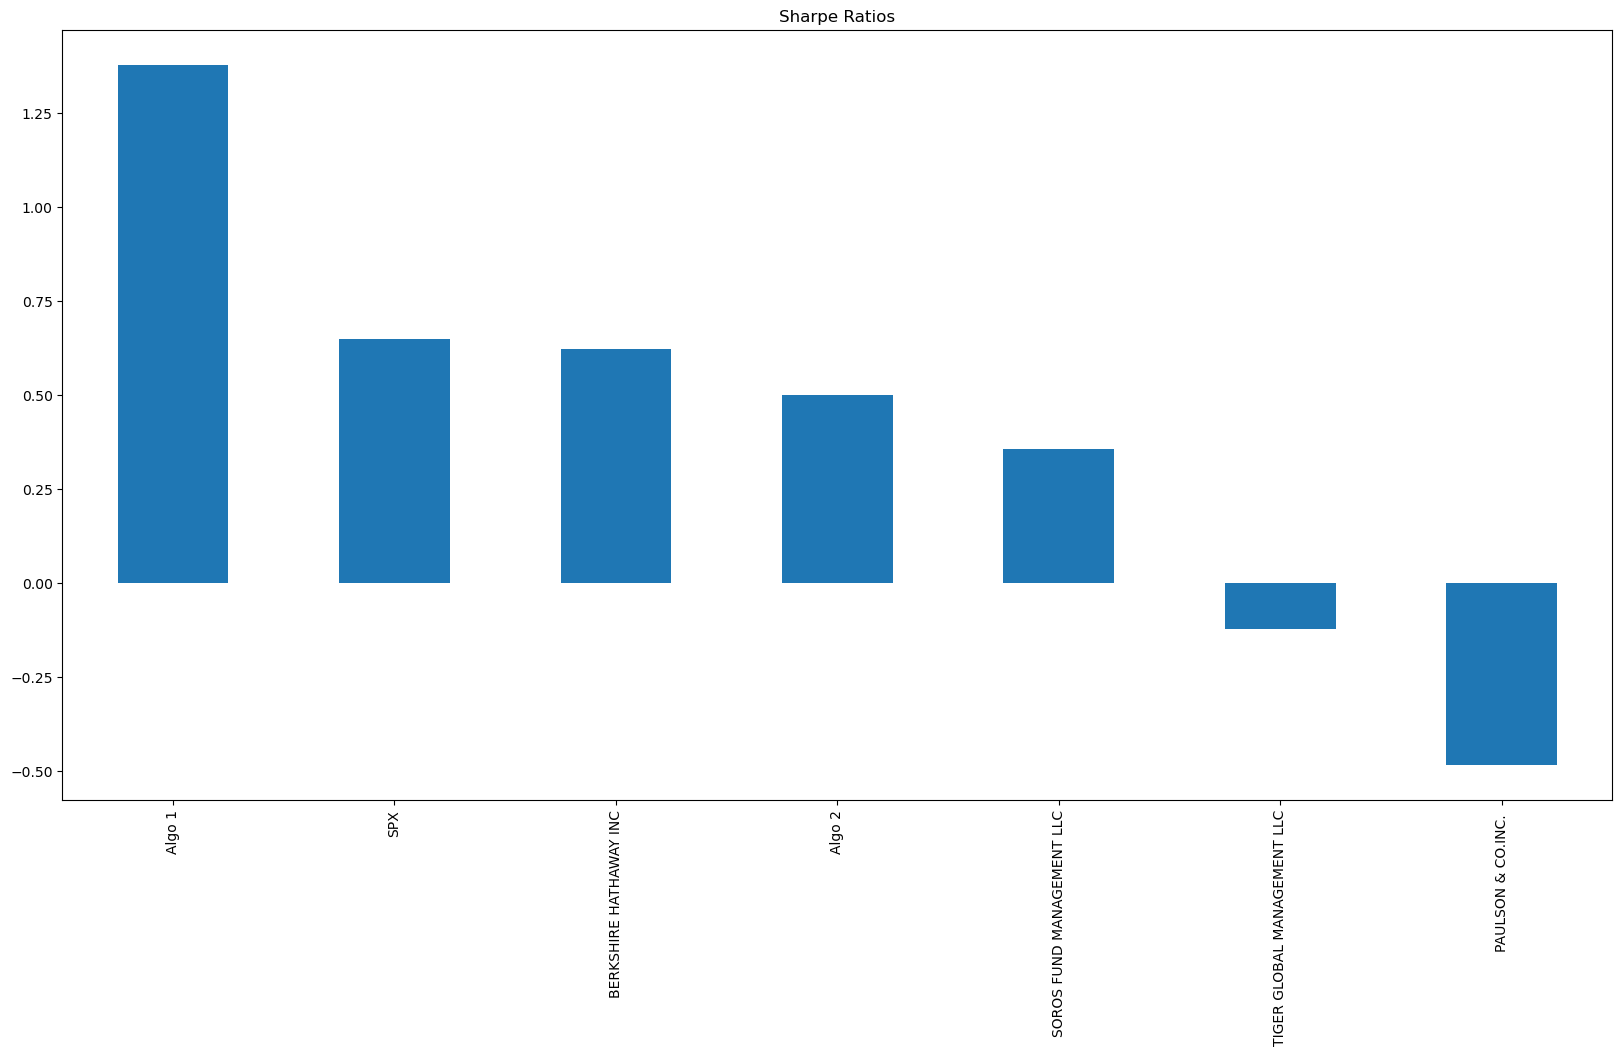

In [25]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.sort_values(ascending=False).plot(figsize=(20,10), kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 substantially outperforms the S&P 500 on a cumulative return and risk-adjusted (Sharpe Ratio) basis. Algo 1 also outperforms all whale portfolios in both regards and exhibits low return correlation. Algo 2 underperforms Algo 1, the S&P 500, and Berkshire Hathaway on a risk-adjusted basis. However, Algo 2 outperforms Soros, Tiger Global, and Paulson.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [26]:
# Reading data from 1st stock
aapl_data = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_df.sort_index(inplace=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [27]:
# Reading data from 2nd stock
cost_data = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_df.sort_index(inplace=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [28]:
# Reading data from 3rd stock
goog_data = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_df.sort_index(inplace=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [29]:
# Combine all stocks in a single DataFrame
all_prices = pd.concat([aapl_df, cost_df, goog_df], axis = "rows", join="inner")
all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns = "Symbol")
all_prices.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [30]:
# Calculate daily returns
all_returns = all_prices.pct_change().dropna()
all_returns.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [31]:
# Set weights
weights = [0.70, 0.15, 0.15]
columns1 = ["Custom Port"]

# Calculate portfolio return
customport_returns = all_returns.dot(weights)
customport_returns.columns=columns1

# Display sample data
customport_returns.head()


Trade DATE
2018-05-14   -0.001276
2018-05-15   -0.009527
2018-05-16    0.009364
2018-05-17   -0.004196
2018-05-18   -0.004727
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [32]:
# Join your returns DataFrame to the original returns DataFrame

joined_returns["Custom Port"] = customport_returns
joined_returns.dropna(inplace=True)
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX,Custom Port
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.001276
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.009527
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009364
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.004196
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.004727


In [33]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_returns.isna().mean()
# No NAs

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
Algo 1                         0.0
Algo 2                         0.0
SPX                            0.0
Custom Port                    0.0
dtype: float64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [34]:
# Calculate the annualized `std`
port_ann_std = joined_returns.std() * np.sqrt(252)
port_ann_std.sort_values(ascending=False)

Custom Port                    0.251911
BERKSHIRE HATHAWAY INC         0.247155
TIGER GLOBAL MANAGEMENT LLC    0.232531
SPX                            0.152054
SOROS FUND MANAGEMENT LLC      0.146675
Algo 2                         0.139556
Algo 1                         0.133704
PAULSON & CO.INC.              0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21D STD'}, xlabel='Date'>

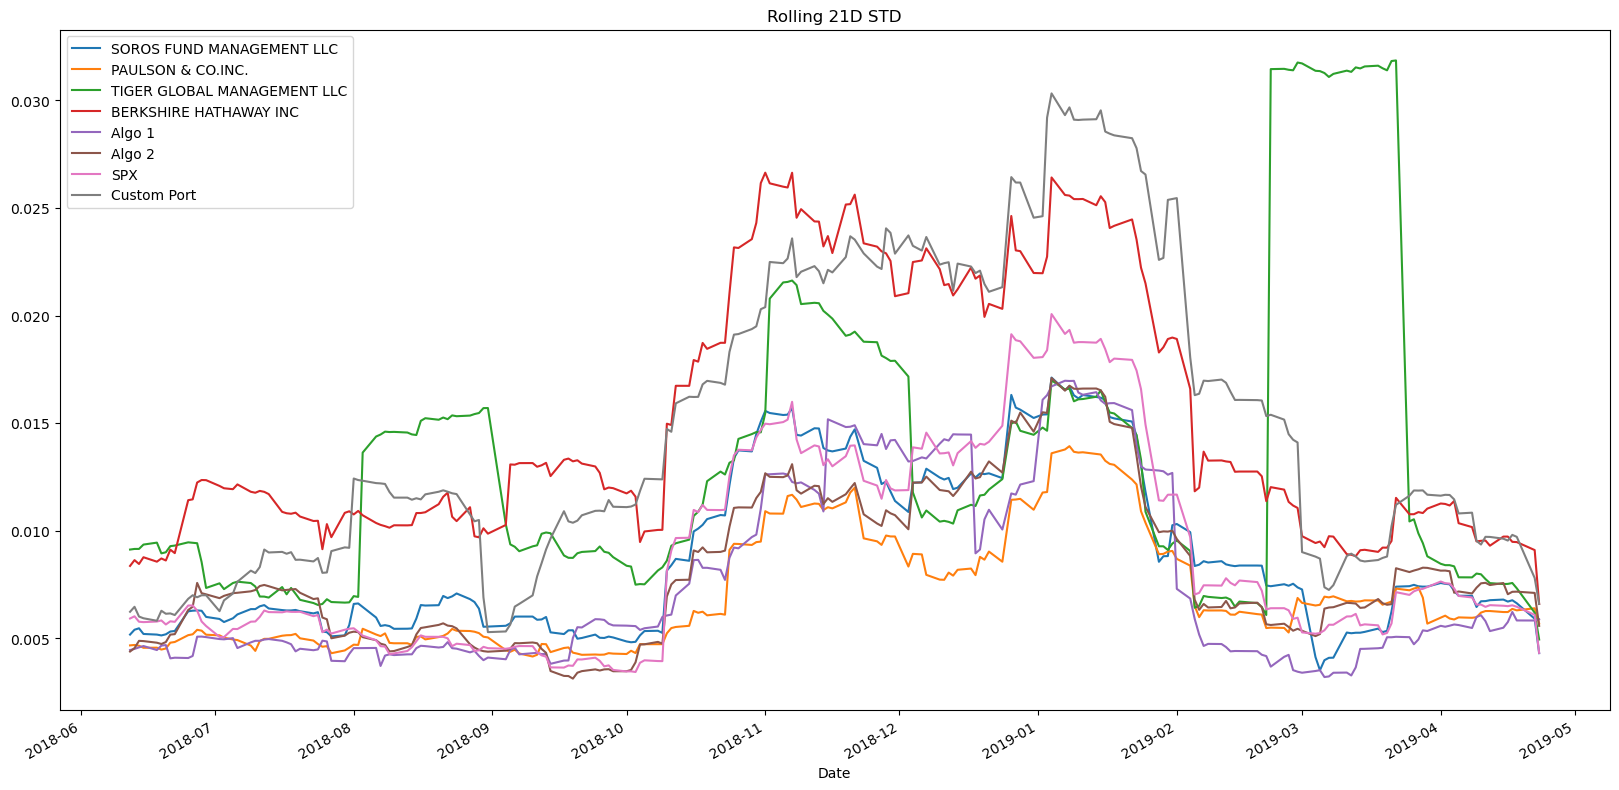

In [35]:
# Calculate rolling standard deviation
joined_returns.rolling(window=21).std().plot(figsize=(20,10), title="Rolling 21D STD")


### Calculate and plot the correlation

<AxesSubplot:>

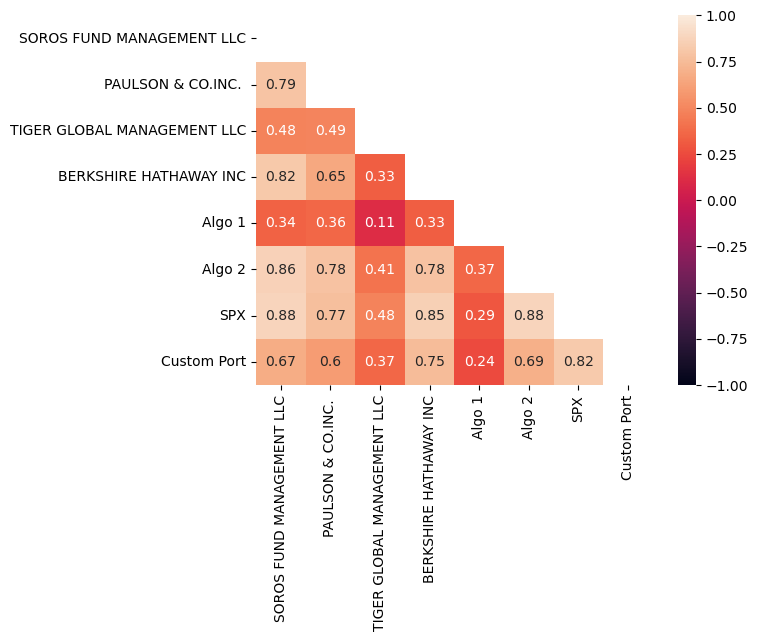

In [36]:
# Calculate and plot the correlation

custom_correlation = joined_returns.corr()
mask1=np.zeros_like(custom_correlation)
mask1[np.triu_indices_from(mask1)] = True
sns.heatmap(custom_correlation, vmin=-1, vmax=1, annot=True, mask=mask1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling Beta of Custom Portfolio vs SPX'}, xlabel='Date'>

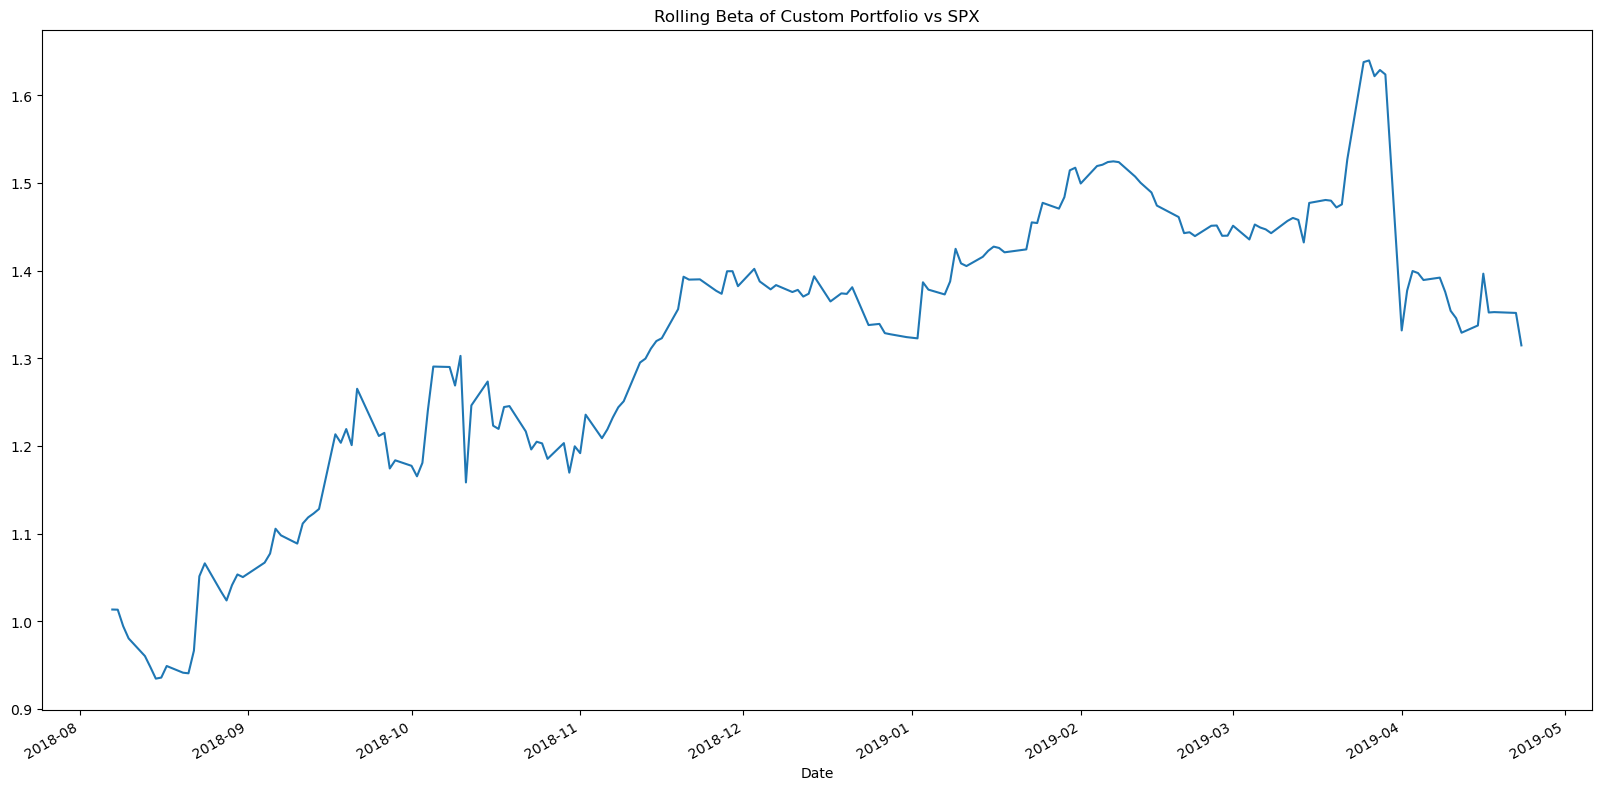

In [37]:
cust_rolling_cov = joined_returns["Custom Port"].rolling(window=60).cov(joined_returns["SPX"])
cust_rolling_var = joined_returns["SPX"].rolling(window=60).var()
cust_rolling_beta = cust_rolling_cov/cust_rolling_var
cust_rolling_beta.plot(figsize=(20,10), title = "Rolling Beta of Custom Portfolio vs SPX")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [38]:
# Calculate Annualized Sharpe Ratios
cust_sharpe_ratios = (joined_returns.mean() *252) / (joined_returns.std()*np.sqrt(252))
cust_sharpe_ratios.sort_values(ascending=False)

Algo 1                         2.035665
Custom Port                    0.670773
SPX                            0.584820
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
BERKSHIRE HATHAWAY INC         0.159756
Algo 2                         0.080607
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

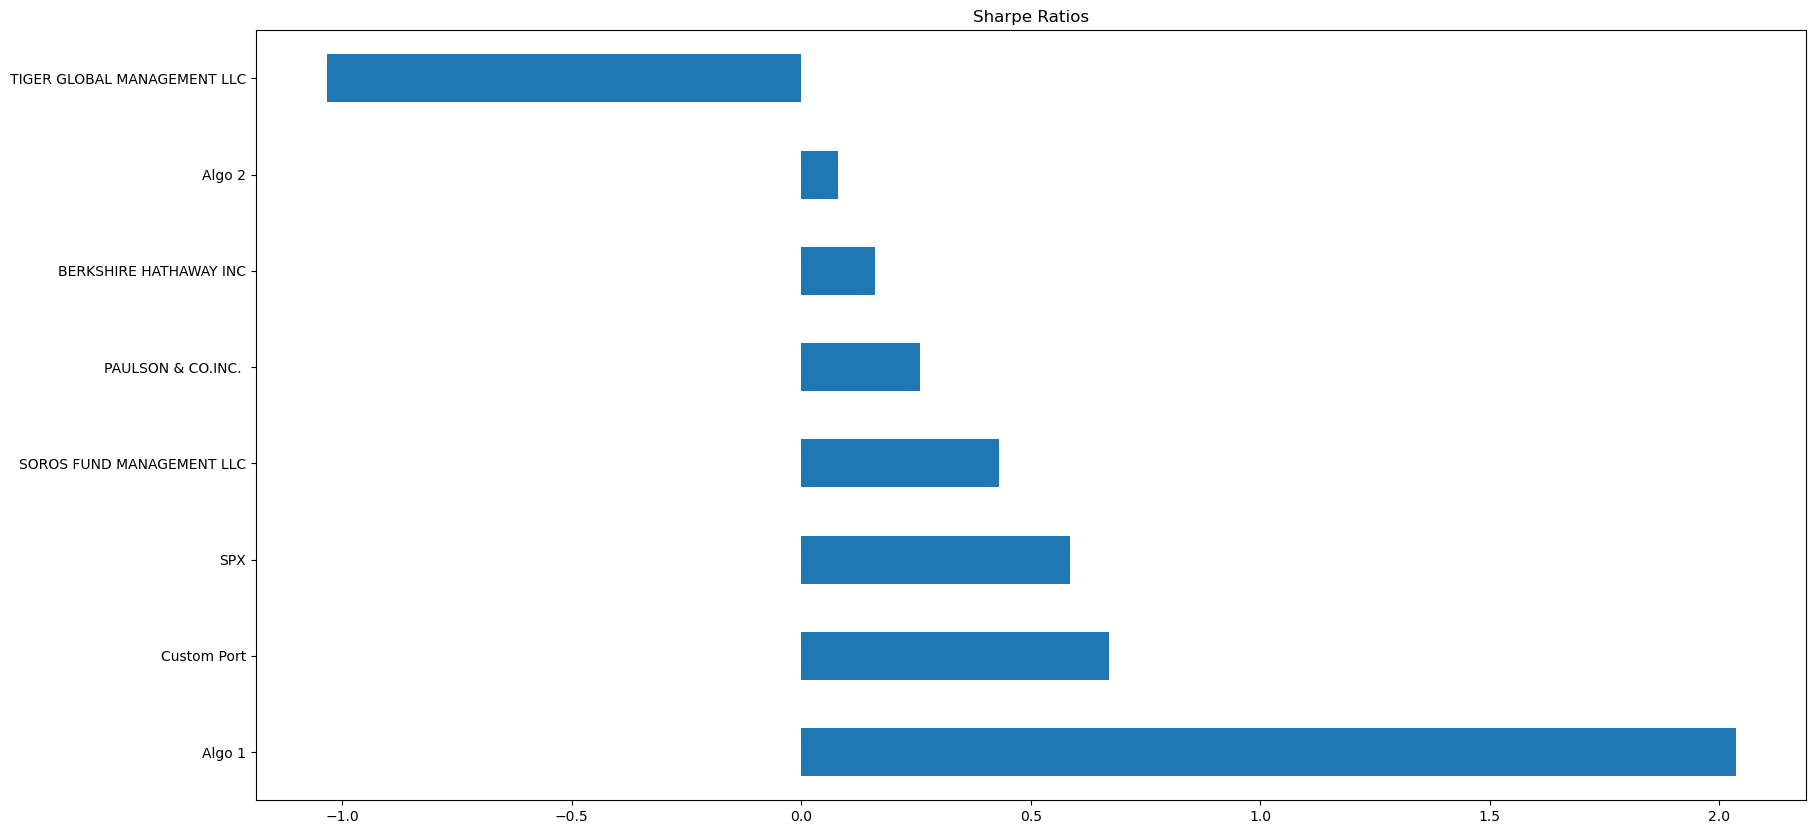

In [39]:
# Visualize the sharpe ratios as a bar plot

cust_sharpe_ratios.sort_values(ascending=False).plot(figsize=(20,10), kind="barh", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

On a risk adjusted basis, my portfolio outperforms the S&P 500. However, a Sharpe Ratio less than 1 is not very good. Algo 1 vastly outperformed my portfolio with a Sharpe Ratio slightly over 2. 